In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pd.set_option("display.max_columns", 63)

In [22]:
df = pd.read_csv('../../data/output/imp_data.csv')
df = df.drop('Unnamed: 0', axis = 1)

In [23]:
df

,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervis,mh_eq_ph_employer,mh_conseq_coworkers,prev_employers_flag,prev_mh_benefits,prev_mh_benefits_awareness,prev_mh_discussion,prev_mh_resources,prev_mh_anonimity,prev_mh_discuss_neg_conseq,prev_ph_discuss_neg_conseq,prev_mh_discussion_cowork,prev_mh_discussion_supervisor,prev_mh_importance_employer,prev_mh_conseq_coworkers,future_ph_specification,why/why_not,future_mh_specification,why/why_not2,mh_hurt_on_career,mh_neg_view_cowork,mh_sharing_friends/fam_flag,mh_bad_response_workplace,mh_family_hist,mh_disorder_past,mh_disorder_current,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,work_position,remote_flag
0,26-100,1.0,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Fear of discrimination,Maybe,Stigma,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,No,Yes,0,Not applicable to me,Not applicable to me,39,Male,Back-end Developer,Sometimes
1,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,Yes,Yes,1,Rarely,Sometimes,29,Male,Back-end Developer|Front-end Developer,Never
2,6-25,1.0,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,No,No,1,Not applicable to me,Not applicable to me,38,Male,Back-end Developer,Always
3,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,Yes,I don't know,No,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,"old back injury, doesn't cause me many issues ...",Maybe,would not if I was not 100% sure that the disc...,"Yes, I think it would",Maybe,Neutral,No,No,Yes,Yes,Yes,1,Sometimes,Sometimes,43,Male,Supervisor/Team Lead,Sometimes
4,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,Maybe,No,No,No,1,I don't know,N/A (not currently aware),Some did,None did,I don't know,Some of them,Some of them,"No, at none of my previous employers",Some of my previous employers,Some did,Some of them,Maybe,Depending on the interview stage and whether I...,No,I don't know,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",Yes,Yes,Yes,Yes,1,Sometimes,Sometimes,43,Female,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,Yes,I don't know,No,1,"Yes, they all did",I was aware of some,Some did,Some did,I don't know,I don't know,None of them,Some of my previous employers,Some of my previous employers,Some did,None of them,No,I believe my health information is my personal...,No,"As previously stated, my health information is.

In [24]:
diz_col = {'self_empl_flag': 'Are you self-employed?',
 'comp_no_empl': 'How many employees does your company or organization have?',
 'tech_comp_flag': 'Is your employer primarily a tech company/organization?',
 'tech_role_flag': 'Is your primary role within your company related to tech/IT?',
 'mh_coverage_flag': 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'mh_coverage_awareness_flag': 'Do you know the options for mental health care available under your employer-provided coverage?',
 'mh_employer_discussion': 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'mh_resources_provided': 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
 'mh_anonimity_flag': 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'mh_medical_leave': 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
 'mh_discussion_neg_impact': 'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
 'ph_discussion_neg_impact': 'Do you think that discussing a physical health issue with your employer would have negative consequences?',
 'mh_discussion_cowork': 'Would you feel comfortable discussing a mental health disorder with your coworkers?',
 'mh_discussion_supervis': 'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
 'mh_eq_ph_employer': 'Do you feel that your employer takes mental health as seriously as physical health?',
 'mh_conseq_coworkers': 'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?',
 'mh_coverage_flag2': 'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?',
 'mh_online_res_flag': 'Do you know local or online resources to seek help for a mental health disorder?',
 'mh_diagnosed&reveal_clients_flag': 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
 'mh_diagnosed&reveal_clients_impact': 'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
 'mh_diagnosed&reveal_cowork_flag': 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
 'mh_cowork_reveal_neg_impact': 'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?',
 'mh_prod_impact': 'Do you believe your productivity is ever affected by a mental health issue?',
 'mh_prod_impact_perc': 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
 'prev_employers_flag': 'Do you have previous employers?',
 'prev_mh_benefits': 'Have your previous employers provided mental health benefits?',
 'prev_mh_benefits_awareness': 'Were you aware of the options for mental health care provided by your previous employers?',
 'prev_mh_discussion': 'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
 'prev_mh_resources': 'Did your previous employers provide resources to learn more about mental health issues and how to seek help?',
 'prev_mh_anonimity': 'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
 'prev_mh_discuss_neg_conseq': 'Do you think that discussing a mental health disorder with previous employers would have negative consequences?',
 'prev_ph_discuss_neg_conseq': 'Do you think that discussing a physical health issue with previous employers would have negative consequences?',
 'prev_mh_discussion_cowork': 'Would you have been willing to discuss a mental health issue with your previous co-workers?',
 'prev_mh_discussion_supervisor': 'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?',
 'prev_mh_importance_employer': 'Did you feel that your previous employers took mental health as seriously as physical health?',
 'prev_mh_conseq_coworkers': 'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?',
 'future_ph_specification': 'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
 'why/why_not': 'Why or why not?',
 'future_mh_specification': 'Would you bring up a mental health issue with a potential employer in an interview?',
 'why/why_not2': 'Why or why not?.1',
 'mh_hurt_on_career': 'Do you feel that being identified as a person with a mental health issue would hurt your career?',
 'mh_neg_view_cowork': 'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?',
 'mh_sharing_friends/fam_flag': 'How willing would you be to share with friends and family that you have a mental illness?',
 'mh_bad_response_workplace': 'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
 'mh_for_others_bad_response_workplace': 'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?',
 'mh_family_hist': 'Do you have a family history of mental illness?',
 'mh_disorder_past': 'Have you had a mental health disorder in the past?',
 'mh_disorder_current': 'Do you currently have a mental health disorder?',
 'yes:what_diagnosis?': 'If yes, what condition(s) have you been diagnosed with?',
 'maybe:whats_your_diag': 'If maybe, what condition(s) do you believe you have?',
 'mh_diagnos_proffesional': 'Have you been diagnosed with a mental health condition by a medical professional?',
 'yes:condition_diagnosed': 'If so, what condition(s) were you diagnosed with?',
 'mh_sought_proffes_treatm': 'Have you ever sought treatment for a mental health issue from a mental health professional?',
 'mh_eff_treat_impact_on_work': 'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
 'mh_not_eff_treat_impact_on_work': 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?',
 'age': 'What is your age?',
 'sex': 'What is your gender?',
 'country_live': 'What country do you live in?',
 'live_us_teritory': 'What US state or territory do you live in?',
 'country_work': 'What country do you work in?',
 'work_us_teritory': 'What US state or territory do you work in?',
 'work_position': 'Which of the following best describes your work position?',
 'remote_flag': 'Do you work remotely?'}

In [25]:
company_size = 300

In [26]:
data = df.head(company_size)

In [27]:
data

,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervis,mh_eq_ph_employer,mh_conseq_coworkers,prev_employers_flag,prev_mh_benefits,prev_mh_benefits_awareness,prev_mh_discussion,prev_mh_resources,prev_mh_anonimity,prev_mh_discuss_neg_conseq,prev_ph_discuss_neg_conseq,prev_mh_discussion_cowork,prev_mh_discussion_supervisor,prev_mh_importance_employer,prev_mh_conseq_coworkers,future_ph_specification,why/why_not,future_mh_specification,why/why_not2,mh_hurt_on_career,mh_neg_view_cowork,mh_sharing_friends/fam_flag,mh_bad_response_workplace,mh_family_hist,mh_disorder_past,mh_disorder_current,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,work_position,remote_flag
0,26-100,1.0,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Fear of discrimination,Maybe,Stigma,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,No,Yes,0,Not applicable to me,Not applicable to me,39,Male,Back-end Developer,Sometimes
1,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,Yes,Yes,1,Rarely,Sometimes,29,Male,Back-end Developer|Front-end Developer,Never
2,6-25,1.0,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,No,No,1,Not applicable to me,Not applicable to me,38,Male,Back-end Developer,Always
3,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,Yes,I don't know,No,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,"old back injury, doesn't cause me many issues ...",Maybe,would not if I was not 100% sure that the disc...,"Yes, I think it would",Maybe,Neutral,No,No,Yes,Yes,Yes,1,Sometimes,Sometimes,43,Male,Supervisor/Team Lead,Sometimes
4,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,Maybe,No,No,No,1,I don't know,N/A (not currently aware),Some did,None did,I don't know,Some of them,Some of them,"No, at none of my previous employers",Some of my previous employers,Some did,Some of them,Maybe,Depending on the interview stage and whether I...,No,I don't know,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",Yes,Yes,Yes,Yes,1,Sometimes,Sometimes,43,Female,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,100-500,1.0,No,No,No,No,I don't know,Very easy,No,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,None did,None of them,Maybe,Fear of discrimination,No,Stigma,"No, I don't think it would","No, I don't think they would",Somewhat o

In [28]:
y = data['mh_disorder_current']

In [29]:
data

,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervis,mh_eq_ph_employer,mh_conseq_coworkers,prev_employers_flag,prev_mh_benefits,prev_mh_benefits_awareness,prev_mh_discussion,prev_mh_resources,prev_mh_anonimity,prev_mh_discuss_neg_conseq,prev_ph_discuss_neg_conseq,prev_mh_discussion_cowork,prev_mh_discussion_supervisor,prev_mh_importance_employer,prev_mh_conseq_coworkers,future_ph_specification,why/why_not,future_mh_specification,why/why_not2,mh_hurt_on_career,mh_neg_view_cowork,mh_sharing_friends/fam_flag,mh_bad_response_workplace,mh_family_hist,mh_disorder_past,mh_disorder_current,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,work_position,remote_flag
0,26-100,1.0,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Fear of discrimination,Maybe,Stigma,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,No,Yes,0,Not applicable to me,Not applicable to me,39,Male,Back-end Developer,Sometimes
1,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,Yes,Yes,1,Rarely,Sometimes,29,Male,Back-end Developer|Front-end Developer,Never
2,6-25,1.0,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,No,No,1,Not applicable to me,Not applicable to me,38,Male,Back-end Developer,Always
3,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,Yes,I don't know,No,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,"old back injury, doesn't cause me many issues ...",Maybe,would not if I was not 100% sure that the disc...,"Yes, I think it would",Maybe,Neutral,No,No,Yes,Yes,Yes,1,Sometimes,Sometimes,43,Male,Supervisor/Team Lead,Sometimes
4,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,Maybe,No,No,No,1,I don't know,N/A (not currently aware),Some did,None did,I don't know,Some of them,Some of them,"No, at none of my previous employers",Some of my previous employers,Some did,Some of them,Maybe,Depending on the interview stage and whether I...,No,I don't know,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",Yes,Yes,Yes,Yes,1,Sometimes,Sometimes,43,Female,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,100-500,1.0,No,No,No,No,I don't know,Very easy,No,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,None did,None of them,Maybe,Fear of discrimination,No,Stigma,"No, I don't think it would","No, I don't think they would",Somewhat o

In [30]:
data.corr()

,tech_comp_flag,prev_employers_flag,mh_sought_proffes_treatm,age
tech_comp_flag,1.000000,-0.087112,0.022798,-0.159456
prev_employers_flag,-0.087112,1.000000,0.092481,0.220080
mh_sought_proffes_treatm,0.022798,0.092481,1.000000,0.061914
age,-0.159456,0.220080,0.061914,1.000000


In [31]:
y

0       No
1      Yes
2       No
3      Yes
4      Yes
      ... 
295    Yes
296    Yes
297    Yes
298     No
299     No
Name: mh_disorder_current, Length: 300, dtype: object

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()

In [34]:
encoded_data = data.copy()

In [35]:
for col in encoded_data.columns:
    # Sostituisci i valori categorici con una codifica numerica
    encoded_data[col] = le.fit_transform(encoded_data[col])

In [36]:
corrwith = encoded_data.corrwith(encoded_data['mh_disorder_current'])

Correlazione non è causalità

<AxesSubplot:>

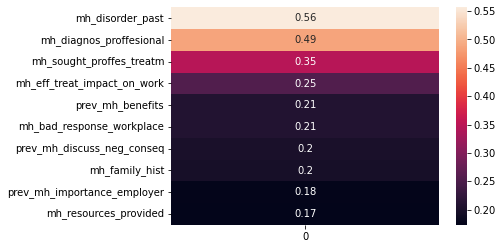

In [37]:
sns.heatmap(pd.DataFrame(abs(corrwith).sort_values(ascending = False)[1:11]), annot = True)

<AxesSubplot:>

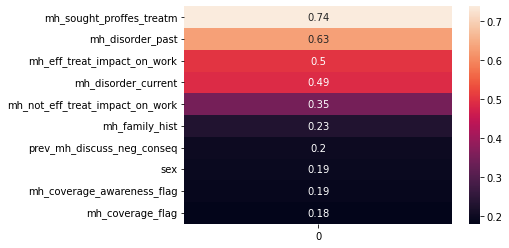

In [38]:
corrwith = encoded_data.corrwith(encoded_data['mh_diagnos_proffesional'])
sns.heatmap(pd.DataFrame(abs(corrwith).sort_values(ascending = False)[1:11]), annot = True)

In [39]:
diz_col[corrwith.sort_values(ascending = False).index[1]]

'Have you ever sought treatment for a mental health issue from a mental health professional?'

In [41]:
corrwith = encoded_data.corrwith(encoded_data['mh_disorder_current'])

In [46]:
cols = ['mh_disorder_past',
 'mh_diagnos_proffesional',
 'mh_sought_proffes_treatm',
 'mh_eff_treat_impact_on_work',
 'prev_mh_benefits',
 'mh_bad_response_workplace',
 'prev_mh_discuss_neg_conseq',
 'mh_family_hist',
 'prev_mh_importance_employer',
 'mh_resources_provided']

In [57]:
j=0
for i in data:
    if len(data[i].unique())<10:
        print(j+1)
        print(diz_col[i])
        print(i)
        print(data[i].unique())
        print('*'*100)
        j += 1


1
How many employees does your company or organization have?
comp_no_empl
['26-100' '6-25' 'More than 1000' '100-500' '500-1000' '1-5']
****************************************************************************************************
2
Is your employer primarily a tech company/organization?
tech_comp_flag
[1. 0.]
****************************************************************************************************
3
Does your employer provide mental health benefits as part of healthcare coverage?
mh_coverage_flag
['Not eligible for coverage / N/A' 'No' 'Yes' "I don't know"]
****************************************************************************************************
4
Do you know the options for mental health care available under your employer-provided coverage?
mh_coverage_awareness_flag
['No' 'Yes' 'I am not sure']
****************************************************************************************************
5
Has your employer ever formally discussed mental health (for

In [58]:
(data['mh_discussion_cowork'] == data['mh_discussion_supervis']).value_counts()

True     157
False    143
dtype: int64

I maybe che hanno risposto di Sì alla domanda successiva, diventano Sì, gli altri diventano no

In [68]:
df['mh_disorder_current']
new_disorder_current = []
for i in range(len(df)):
    if df['mh_disorder_current'][i]=='Yes':
        new_disorder_current.append('Yes')
    elif df['mh_disorder_current'][i]=='No':
        new_disorder_current.append('No')
    elif df['mh_diagnos_proffesional'][i]=='Yes':
        new_disorder_current.append('Yes')
    else:
        new_disorder_current.append('No')
new_disorder_current

        

        

['No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 

In [70]:
pd.DataFrame(new_disorder_current).value_counts()

No     734
Yes    699
dtype: int64

In [61]:
(data['mh_disorder_current']=='Maybe').value_counts()

False    235
True      65
Name: mh_disorder_current, dtype: int64

In [60]:
((data['mh_disorder_current']=='Maybe') == (data['mh_diagnos_proffesional']=='No')).value_counts()

True     160
False    140
dtype: int64

In [62]:
domande = ['mh_coverage_flag', 'mh_coverage_awareness_flag', 'mh_employer_discussion', 
          'mh_resources_provided', 'mh_anonimity_flag', 'mh_medical_leave',
          'mh_discussion_neg_impact', 'mh_discussion_cowork', 'mh_discussion_supervis',
          'mh_conseq_coworkers', 'mh_eq_ph_employer', 'prev_mh_benefits',
          'future_mh_specification', 'mh_hurt_on_career', 'mh_neg_view_cowork',
          'mh_sharing_friends/fam_flag', 'mh_bad_response_workplace', 'mh_family_hist', 'mh_disorder_past',
          'mh_disorder_current', 'mh_diagnos_proffesional', 'mh_sought_proffes_treatm',
          'sex', 'remote_flag' ]

In [63]:
len(domande)

24

In [76]:
new_df = df.copy()

In [77]:
new_df = new_df[domande]
new_df['mh_disorder_current'] = new_disorder_current

In [79]:
new_df['mh_disorder_current'].value_counts()

No     734
Yes    699
Name: mh_disorder_current, dtype: int64

In [80]:
j=0
for i in new_df:
    print(j+1)
    print(diz_col[i])
    print(i)
    print(data[i].unique())
    print('*'*100)
    j += 1


1
Does your employer provide mental health benefits as part of healthcare coverage?
mh_coverage_flag
['Not eligible for coverage / N/A' 'No' 'Yes' "I don't know"]
****************************************************************************************************
2
Do you know the options for mental health care available under your employer-provided coverage?
mh_coverage_awareness_flag
['No' 'Yes' 'I am not sure']
****************************************************************************************************
3
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
mh_employer_discussion
['No' 'Yes' "I don't know"]
****************************************************************************************************
4
Does your employer offer resources to learn more about mental health concerns and options for seeking help?
mh_resources_provided
['No' 'Yes' "I don't know"]
********************************

In [82]:
df['age']

0       39
1       29
2       38
3       43
4       43
        ..
1428    34
1429    56
1430    52
1431    30
1432    25
Name: age, Length: 1433, dtype: int64

In [83]:
new_df['age'] = df['age']

In [85]:
new_df.to_csv('selected_questions.csv')

In [88]:
new_df['mh_coverage_flag'].value_counts()

Yes                                818
I don't know                       319
No                                 213
Not eligible for coverage / N/A     83
Name: mh_coverage_flag, dtype: int64

In [89]:
mh_coverage_flag = []
for i in new_df['mh_coverage_flag']:
    if i != 'mh_coverage_flag':
        mh_coverage_flag.append(i)
    else:
        mh_coverage_flag.append("I don't know")

In [90]:
new_df['mh_coverage_flag'] = mh_coverage_flag

In [98]:
new_df['mh_hurt_on_career'].value_counts()

Maybe                         588
Yes, I think it would         563
No, I don't think it would    147
Yes, it has                   105
No, it has not                 30
Name: mh_hurt_on_career, dtype: int64

In [96]:
mh_hurt_on_career = new_df['mh_hurt_on_career'].replace('Yes, I think it would', 'Yes')

In [97]:
mh_hurt_on_career = mh_hurt_on_career.replace('Yes, it has', 'Yes')

In [99]:
mh_hurt_on_career = mh_hurt_on_career.replace("No, I don't think it would", 'No')

In [100]:
mh_hurt_on_career = mh_hurt_on_career.replace("No, it has not", 'No')

In [103]:
mh_hurt_on_career.value_counts()

Yes      668
Maybe    588
No       177
Name: mh_hurt_on_career, dtype: int64

In [104]:
new_df['mh_hurt_on_career'] = mh_hurt_on_career

In [105]:
new_df.to_csv('edit_q&a.csv')